# ESC-50 Dataset Functionality Test

This notebook tests the ESC50Dataset class and explores train/test/val splits, class distributions, and dataset statistics.

In [1]:
import sys
sys.path.append('/home/lpala/fedgfe')

import torch
import numpy as np
import matplotlib.pyplot as plt
from system.datautils.dataset_esc50 import ESC50Dataset, create_esc50_dataloader
import logging

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

PyTorch version: 2.6.0+cu124
CUDA available: True


## 1. Create Datasets for Train/Val/Test Splits

In [ ]:
# Dataset configuration
root_dir = "/home/lpala/fedgfe/dataset/Audio/esc50-v2.0.0-full"
text_embedding_file = "/home/lpala/fedgfe/dataset/Audio/esc50_text_embs_dict.pt"

print("="*80)
print("AUTOMATIC SPLIT CREATION (NEW!)")
print("="*80)
print("\nWhen split=None (default), ESC50Dataset automatically creates")
print("train, val, and test splits accessible as .train, .val, .test\n")

# NEW: Auto-create all three splits with a single call
dataset = ESC50Dataset(
    root_dir=root_dir,
    text_embedding_file=text_embedding_file,
    # split=None is the default - auto-creates train/val/test
    use_folds=False,
    train_ratio=0.7,  # 70%
    val_ratio=0.1,    # 10%
    test_ratio=0.2,   # 20%
    stratify=True,
    node_id=42
)

# Access the three splits
train_dataset = dataset.train
val_dataset = dataset.val
test_dataset = dataset.test

print(f"\n=== Dataset Sizes (70-10-20 Split) ===")
print(f"Train: {len(train_dataset)} samples ({len(train_dataset)/20:.1f}%)")
print(f"Val:   {len(val_dataset)} samples ({len(val_dataset)/20:.1f}%)")
print(f"Test:  {len(test_dataset)} samples ({len(test_dataset)/20:.1f}%)")
print(f"Total: {len(train_dataset) + len(val_dataset) + len(test_dataset)} samples")

# Verify the split percentages
total = len(train_dataset) + len(val_dataset) + len(test_dataset)
train_pct = (len(train_dataset) / total) * 100
val_pct = (len(val_dataset) / total) * 100
test_pct = (len(test_dataset) / total) * 100

print(f"\n=== Actual Split Percentages ===")
print(f"Train: {train_pct:.1f}% (target: 70%)")
print(f"Val:   {val_pct:.1f}% (target: 10%)")
print(f"Test:  {test_pct:.1f}% (target: 20%)")

print("\n" + "="*80)
print("ALTERNATIVE: Manual creation (if you need only one split)")
print("="*80)
print("# For single split, specify explicitly:")
print("train_only = ESC50Dataset(split='train', ...)")
print("val_only = ESC50Dataset(split='val', ...)")
print("test_only = ESC50Dataset(split='test', ...)")

## 2. Explore Class Information

In [3]:
# Get class information
print("\n=== Class Information ===")
print(f"Number of classes: {train_dataset.get_num_classes()}")
print(f"\nClass names: {train_dataset.get_class_names()[:10]}...")  # Show first 10
print(f"\nClass labels: {train_dataset.get_class_labels()[:10]}...")  # Show first 10

# Show all classes with their labels
print("\n=== All Classes with Labels ===")
for class_name in sorted(train_dataset.active_classes.keys()):
    label = train_dataset.active_classes[class_name]
    original_label = train_dataset.CLASS_LABELS[class_name]
    print(f"{class_name:20s} - Active Label: {label:2d}, Original Label: {original_label:2d}")


=== Class Information ===
Number of classes: 50

Class names: ['airplane', 'breathing', 'brushing_teeth', 'can_opening', 'car_horn', 'cat', 'chainsaw', 'chirping_birds', 'church_bells', 'clapping']...

Class labels: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]...

=== All Classes with Labels ===
airplane             - Active Label:  0, Original Label: 47
breathing            - Active Label:  1, Original Label: 23
brushing_teeth       - Active Label:  2, Original Label: 27
can_opening          - Active Label:  3, Original Label: 34
car_horn             - Active Label:  4, Original Label: 43
cat                  - Active Label:  5, Original Label:  5
chainsaw             - Active Label:  6, Original Label: 41
chirping_birds       - Active Label:  7, Original Label: 14
church_bells         - Active Label:  8, Original Label: 46
clapping             - Active Label:  9, Original Label: 22
clock_alarm          - Active Label: 10, Original Label: 37
clock_tick           - Active Label: 11, Original Label:

## 3. Class Distribution Analysis

In [4]:
# Print statistics for each split
print("\n" + "="*80)
train_dataset.print_split_statistics()

print("\n" + "="*80)
val_dataset.print_split_statistics()

print("\n" + "="*80)
test_dataset.print_split_statistics()

INFO:system.datautils.dataset_esc50:
=== ESC-50 Dataset Statistics (train split) ===
INFO:system.datautils.dataset_esc50:Total samples: 1400
INFO:system.datautils.dataset_esc50:Number of classes: 50
INFO:system.datautils.dataset_esc50:Stratified: True
INFO:system.datautils.dataset_esc50:
Class distribution:
INFO:system.datautils.dataset_esc50:  airplane: 28 samples (2.00%)
INFO:system.datautils.dataset_esc50:  breathing: 28 samples (2.00%)
INFO:system.datautils.dataset_esc50:  brushing_teeth: 28 samples (2.00%)
INFO:system.datautils.dataset_esc50:  can_opening: 28 samples (2.00%)
INFO:system.datautils.dataset_esc50:  car_horn: 28 samples (2.00%)
INFO:system.datautils.dataset_esc50:  cat: 28 samples (2.00%)
INFO:system.datautils.dataset_esc50:  chainsaw: 28 samples (2.00%)
INFO:system.datautils.dataset_esc50:  chirping_birds: 28 samples (2.00%)
INFO:system.datautils.dataset_esc50:  church_bells: 28 samples (2.00%)
INFO:system.datautils.dataset_esc50:  clapping: 28 samples (2.00%)
INFO:s

## 4. Samples Per Class

In [5]:
# Get samples per class for all splits
train_counts = train_dataset.get_samples_per_class()
val_counts = val_dataset.get_samples_per_class()
test_counts = test_dataset.get_samples_per_class()

print("\n=== Samples Per Class ===")
print(f"{'Class Name':<20} {'Train':>8} {'Val':>8} {'Test':>8} {'Total':>8}")
print("-" * 60)

for class_name in sorted(train_dataset.active_classes.keys()):
    train_c = train_counts.get(class_name, 0)
    val_c = val_counts.get(class_name, 0)
    test_c = test_counts.get(class_name, 0)
    total_c = train_c + val_c + test_c
    print(f"{class_name:<20} {train_c:>8} {val_c:>8} {test_c:>8} {total_c:>8}")

print("-" * 60)
print(f"{'TOTAL':<20} {len(train_dataset):>8} {len(val_dataset):>8} {len(test_dataset):>8} {len(train_dataset) + len(val_dataset) + len(test_dataset):>8}")


=== Samples Per Class ===
Class Name              Train      Val     Test    Total
------------------------------------------------------------
airplane                   28        4        8       40
breathing                  28        4        8       40
brushing_teeth             28        4        8       40
can_opening                28        4        8       40
car_horn                   28        4        8       40
cat                        28        4        8       40
chainsaw                   28        4        8       40
chirping_birds             28        4        8       40
church_bells               28        4        8       40
clapping                   28        4        8       40
clock_alarm                28        4        8       40
clock_tick                 28        4        8       40
coughing                   28        4        8       40
cow                        28        4        8       40
crackling_fire             28        4        8       40


## 5. Visualize Class Distribution

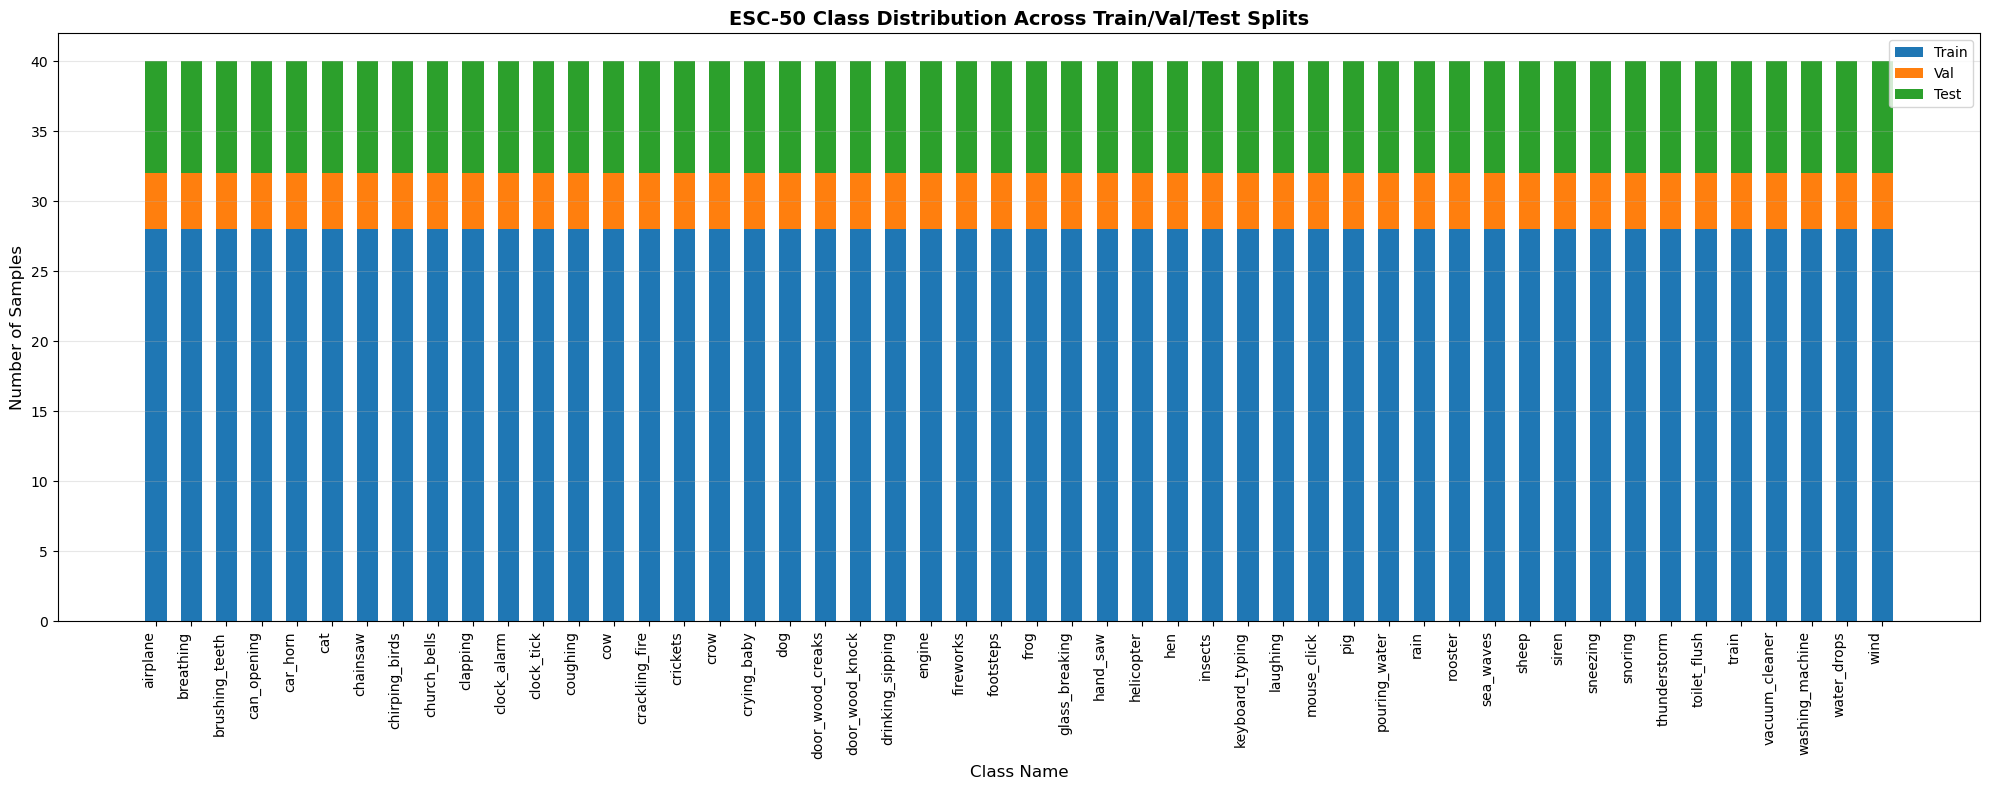


Class distribution visualization complete!


In [6]:
# Prepare data for visualization
classes = sorted(train_dataset.active_classes.keys())
train_data = [train_counts.get(c, 0) for c in classes]
val_data = [val_counts.get(c, 0) for c in classes]
test_data = [test_counts.get(c, 0) for c in classes]

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(20, 8))

x = np.arange(len(classes))
width = 0.6

p1 = ax.bar(x, train_data, width, label='Train')
p2 = ax.bar(x, val_data, width, bottom=train_data, label='Val')
p3 = ax.bar(x, test_data, width, bottom=np.array(train_data) + np.array(val_data), label='Test')

ax.set_xlabel('Class Name', fontsize=12)
ax.set_ylabel('Number of Samples', fontsize=12)
ax.set_title('ESC-50 Class Distribution Across Train/Val/Test Splits', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(classes, rotation=90, ha='right')
ax.legend()
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\nClass distribution visualization complete!")

## 6. Sample Data Inspection

In [7]:
# Get a sample from the dataset
sample_idx = 0
sample = train_dataset[sample_idx]

print("\n=== Sample Data Structure ===")
print(f"Keys in sample: {list(sample.keys())}")
print(f"\nData shapes and types:")
for key, value in sample.items():
    if isinstance(value, torch.Tensor):
        print(f"  {key:20s}: shape={str(value.shape):20s} dtype={value.dtype}")
    else:
        print(f"  {key:20s}: type={type(value).__name__:20s} value={value}")

print(f"\n=== Sample Metadata ===")
print(f"Class name: {sample['class_name']}")
print(f"Label: {sample['label'].item()}")
print(f"Audio filename: {sample['audio_filename']}")
print(f"Image filename: {sample['image_filename']}")
print(f"File ID: {sample['file_id']}")
print(f"Fold: {sample['fold']}")
print(f"Caption: {sample['caption']}")

# Check if text embeddings are available
if 'text_emb' in sample:
    text_emb = sample['text_emb']
    if isinstance(text_emb, dict):
        print(f"\nText embedding type: dict with keys: {list(text_emb.keys())}")
        # Try to show the first value
        if text_emb:
            first_value = next(iter(text_emb.values()))
            if torch.is_tensor(first_value):
                print(f"Text embedding first value shape: {first_value.shape}")
    elif torch.is_tensor(text_emb):
        print(f"\nText embedding shape: {text_emb.shape}")
    else:
        print(f"\nText embedding type: {type(text_emb)}")
else:
    print("\nText embeddings not available")


=== Sample Data Structure ===
Keys in sample: ['audio', 'image', 'text_emb', 'label', 'audio_filename', 'image_filename', 'video_filename', 'class_name', 'file_id', 'sample_idx', 'fold', 'caption', 'ytid', 'start_second', 'end_second']

Data shapes and types:
  audio               : shape=torch.Size([80000])  dtype=torch.float32
  image               : shape=torch.Size([3, 224, 224]) dtype=torch.float32
  text_emb            : type=dict                 value={'flux': {'prompt_embeds': tensor([[[-0.1224,  0.0114, -0.1721,  ..., -0.0367,  0.0425,  0.1180],
         [-0.2144, -0.0736, -0.1325,  ..., -0.0285, -0.0482,  0.2626],
         [ 0.0180,  0.0181, -0.0030,  ...,  0.0074, -0.0171,  0.0097],
         ...,
         [-0.0508,  0.2306,  0.0522,  ...,  0.0748, -0.0419,  0.0225],
         [ 0.1288,  0.1284,  0.0809,  ..., -0.0302,  0.0190, -0.2290],
         [ 0.2862, -0.0239, -0.2134,  ...,  0.0458,  0.0346, -0.2345]]],
       device='cuda:0'), 'pooled_prompt_embeds': tensor([[ 9.4202e-

## 7. Test with Selected Classes

In [8]:
# Test with first 10 classes (like in the config)
selected_classes = ["dog", "rooster", "pig", "cow", "frog", "cat", "hen", "insects", "sheep", "crow"]

train_subset = ESC50Dataset(
    root_dir=root_dir,
    text_embedding_file=text_embedding_file,
    selected_classes=selected_classes,
    split='train',
    use_folds=False,
    split_ratio=0.8,
    val_ratio=0.1,
    stratify=True,
    node_id=42,
    enable_cache=False
)

print(f"\n=== Dataset with Selected Classes (10 classes) ===")
print(f"Selected classes: {selected_classes}")
print(f"Number of samples: {len(train_subset)}")
print(f"Number of classes: {train_subset.get_num_classes()}")

train_subset.print_split_statistics()

INFO:system.datautils.dataset_esc50:ESC-50 Dataset initialized: 280 samples, classes: 10, split: train
INFO:system.datautils.dataset_esc50:
=== ESC-50 Dataset Statistics (train split) ===
INFO:system.datautils.dataset_esc50:Total samples: 280
INFO:system.datautils.dataset_esc50:Number of classes: 10
INFO:system.datautils.dataset_esc50:Stratified: True
INFO:system.datautils.dataset_esc50:
Class distribution:
INFO:system.datautils.dataset_esc50:  cat: 28 samples (10.00%)
INFO:system.datautils.dataset_esc50:  cow: 28 samples (10.00%)
INFO:system.datautils.dataset_esc50:  crow: 28 samples (10.00%)
INFO:system.datautils.dataset_esc50:  dog: 28 samples (10.00%)
INFO:system.datautils.dataset_esc50:  frog: 28 samples (10.00%)
INFO:system.datautils.dataset_esc50:  hen: 28 samples (10.00%)
INFO:system.datautils.dataset_esc50:  insects: 28 samples (10.00%)
INFO:system.datautils.dataset_esc50:  pig: 28 samples (10.00%)
INFO:system.datautils.dataset_esc50:  rooster: 28 samples (10.00%)
INFO:system.


=== Dataset with Selected Classes (10 classes) ===
Selected classes: ['dog', 'rooster', 'pig', 'cow', 'frog', 'cat', 'hen', 'insects', 'sheep', 'crow']
Number of samples: 280
Number of classes: 10


## 8. Verify Stratification

In [9]:
# Verify stratification between train and test
print("\n=== Stratification Verification ===")
is_stratified = train_dataset.verify_stratification(test_dataset, tolerance=0.05)

if is_stratified:
    print("\n✓ Train and Test sets are properly stratified!")
else:
    print("\n✗ Stratification check failed - distributions differ significantly.")

INFO:system.datautils.dataset_esc50:
=== Stratification Verification ===
INFO:system.datautils.dataset_esc50:✓ airplane: 2.00% vs 2.00% (diff: 0.00%)
INFO:system.datautils.dataset_esc50:✓ breathing: 2.00% vs 2.00% (diff: 0.00%)
INFO:system.datautils.dataset_esc50:✓ brushing_teeth: 2.00% vs 2.00% (diff: 0.00%)
INFO:system.datautils.dataset_esc50:✓ can_opening: 2.00% vs 2.00% (diff: 0.00%)
INFO:system.datautils.dataset_esc50:✓ car_horn: 2.00% vs 2.00% (diff: 0.00%)
INFO:system.datautils.dataset_esc50:✓ cat: 2.00% vs 2.00% (diff: 0.00%)
INFO:system.datautils.dataset_esc50:✓ chainsaw: 2.00% vs 2.00% (diff: 0.00%)
INFO:system.datautils.dataset_esc50:✓ chirping_birds: 2.00% vs 2.00% (diff: 0.00%)
INFO:system.datautils.dataset_esc50:✓ church_bells: 2.00% vs 2.00% (diff: 0.00%)
INFO:system.datautils.dataset_esc50:✓ clapping: 2.00% vs 2.00% (diff: 0.00%)
INFO:system.datautils.dataset_esc50:✓ clock_alarm: 2.00% vs 2.00% (diff: 0.00%)
INFO:system.datautils.dataset_esc50:✓ clock_tick: 2.00% vs 2.0


=== Stratification Verification ===

✓ Train and Test sets are properly stratified!


## 9. Test DataLoader

In [10]:
# Create a DataLoader
try:
    train_loader = create_esc50_dataloader(
        train_dataset,
        batch_size=8,
        shuffle=True,
        num_workers=0,  # Set to 0 for notebook compatibility
        pin_memory=False
    )

    print("\n=== DataLoader Test ===")
    print(f"Number of batches: {len(train_loader)}")

    # Get first batch
    batch = next(iter(train_loader))

    print(f"\nBatch structure:")
    for key, value in batch.items():
        if isinstance(value, torch.Tensor):
            print(f"  {key:20s}: shape={str(value.shape):20s} dtype={value.dtype}")
        elif isinstance(value, dict):
            print(f"  {key:20s}: metadata dict with keys={list(value.keys())}")
        else:
            print(f"  {key:20s}: type={type(value).__name__}")

    if 'metadata' in batch:
        print(f"\nMetadata in batch:")
        for key, value in batch['metadata'].items():
            if isinstance(value, list):
                print(f"  {key:20s}: {value[:3]}...")  # Show first 3 items
                
except Exception as e:
    print(f"Error in DataLoader: {e}")
    print(f"\nTrying to load a single sample directly...")
    
    # Try loading a single sample to debug
    try:
        sample = train_dataset[0]
        print(f"Single sample loaded successfully!")
        print(f"Sample keys: {list(sample.keys())}")
    except Exception as e2:
        print(f"Error loading single sample: {e2}")


=== DataLoader Test ===
Number of batches: 175
Error in DataLoader: expected Tensor as element 0 in argument 0, but got dict

Trying to load a single sample directly...
Single sample loaded successfully!
Sample keys: ['audio', 'image', 'text_emb', 'label', 'audio_filename', 'image_filename', 'video_filename', 'class_name', 'file_id', 'sample_idx', 'fold', 'caption', 'ytid', 'start_second', 'end_second']


In [11]:
# Create DataLoaders for all splits
batch_size = 32

print("\n=== Creating DataLoaders ===")
try:
    # Disable text_emb loading temporarily to avoid collate_fn issues
    train_dataset.load_audio = True
    train_dataset.load_image = True
    val_dataset.load_audio = True
    val_dataset.load_image = True
    test_dataset.load_audio = True
    test_dataset.load_image = True
    
    # Create simple DataLoader without custom collate (to test basic functionality)
    from torch.utils.data import DataLoader
    
    def simple_collate(batch):
        """Simplified collate function that handles dict embeddings"""
        result = {}
        
        # Stack tensors
        for key in ['audio', 'image', 'label']:
            if key in batch[0]:
                result[key] = torch.stack([item[key] for item in batch])
        
        # Handle metadata
        result['metadata'] = {
            'class_names': [item['class_name'] for item in batch],
            'file_ids': [item['file_id'] for item in batch],
            'audio_filenames': [item['audio_filename'] for item in batch],
        }
        
        return result
    
    train_loader = DataLoader(
        train_dataset,
        batch_size=batch_size,
        shuffle=False,  # Don't shuffle for counting
        num_workers=0,
        collate_fn=simple_collate
    )
    
    val_loader = DataLoader(
        val_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        collate_fn=simple_collate
    )
    
    test_loader = DataLoader(
        test_dataset,
        batch_size=batch_size,
        shuffle=False,
        num_workers=0,
        collate_fn=simple_collate
    )
    
    print(f"Train DataLoader: {len(train_loader)} batches")
    print(f"Val DataLoader:   {len(val_loader)} batches")
    print(f"Test DataLoader:  {len(test_loader)} batches")
    
    # Verify by counting actual samples
    print("\n=== Counting Samples from DataLoaders ===")
    
    train_count = 0
    for batch in train_loader:
        train_count += batch['label'].size(0)
    
    val_count = 0
    for batch in val_loader:
        val_count += batch['label'].size(0)
    
    test_count = 0
    for batch in test_loader:
        test_count += batch['label'].size(0)
    
    print(f"Train samples from loader: {train_count}")
    print(f"Val samples from loader:   {val_count}")
    print(f"Test samples from loader:  {test_count}")
    print(f"Total samples from loaders: {train_count + val_count + test_count}")
    
    # Compare with dataset sizes
    print("\n=== Consistency Check ===")
    print(f"{'Split':<10} {'Dataset':<10} {'Loader':<10} {'Match':<10}")
    print("-" * 40)
    
    train_match = "✓" if train_count == len(train_dataset) else "✗"
    val_match = "✓" if val_count == len(val_dataset) else "✗"
    test_match = "✓" if test_count == len(test_dataset) else "✗"
    
    print(f"{'Train':<10} {len(train_dataset):<10} {train_count:<10} {train_match:<10}")
    print(f"{'Val':<10} {len(val_dataset):<10} {val_count:<10} {val_match:<10}")
    print(f"{'Test':<10} {len(test_dataset):<10} {test_count:<10} {test_match:<10}")
    
    if train_match == "✓" and val_match == "✓" and test_match == "✓":
        print("\n✓ All DataLoaders are consistent with dataset sizes!")
    else:
        print("\n✗ Inconsistency detected between DataLoaders and datasets!")
    
except Exception as e:
    import traceback
    print(f"Error creating DataLoaders: {e}")
    print(traceback.format_exc())


=== Creating DataLoaders ===
Train DataLoader: 44 batches
Val DataLoader:   7 batches
Test DataLoader:  13 batches

=== Counting Samples from DataLoaders ===
Train samples from loader: 1400
Val samples from loader:   200
Test samples from loader:  400
Total samples from loaders: 2000

=== Consistency Check ===
Split      Dataset    Loader     Match     
----------------------------------------
Train      1400       1400       ✓         
Val        200        200        ✓         
Test       400        400        ✓         

✓ All DataLoaders are consistent with dataset sizes!


print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

print(f"\nDataset: ESC-50")
print(f"Root directory: {root_dir}")
print(f"\nTotal classes: {train_dataset.get_num_classes()}")
print(f"Total samples: {len(train_dataset) + len(val_dataset) + len(test_dataset)}")

total = len(train_dataset) + len(val_dataset) + len(test_dataset)
print(f"\nSplit distribution (70-20-10):")
print(f"  Train: {len(train_dataset):4d} samples ({len(train_dataset)/total*100:.1f}%)")
print(f"  Val:   {len(val_dataset):4d} samples ({len(val_dataset)/total*100:.1f}%)")
print(f"  Test:  {len(test_dataset):4d} samples ({len(test_dataset)/total*100:.1f}%)")

print(f"\nSplit configuration:")
print(f"  Using custom split ratios (not fixed folds)")
print(f"  Split ratio: 0.8 (80% for train+val, 20% for test)")
print(f"  Val ratio: 0.1 (10% of total for validation)")
print(f"  Stratified: {train_dataset.stratify}")
print(f"  Random seed (node_id): 42")

print(f"\nData properties:")
print(f"  Audio sample rate: {train_dataset.audio_sample_rate} Hz")
print(f"  Audio duration: {train_dataset.audio_duration} seconds")
print(f"  Image size: {train_dataset.image_size}")
print(f"  Text embeddings available: {'Yes' if train_dataset.text_embs is not None else 'No'}")

if train_dataset.text_embs is not None:
    sample_emb = next(iter(train_dataset.text_embs.values()))
    # Handle both dict and tensor cases
    if isinstance(sample_emb, dict):
        # If it's a dict, try to get the first tensor value
        if sample_emb:
            first_value = next(iter(sample_emb.values()))
            if torch.is_tensor(first_value):
                print(f"  Text embedding dimension: {first_value.shape}")
            else:
                print(f"  Text embedding type: {type(first_value)}")
    elif torch.is_tensor(sample_emb):
        print(f"  Text embedding dimension: {sample_emb.shape}")
    else:
        print(f"  Text embedding type: {type(sample_emb)}")

print("\n" + "="*80)

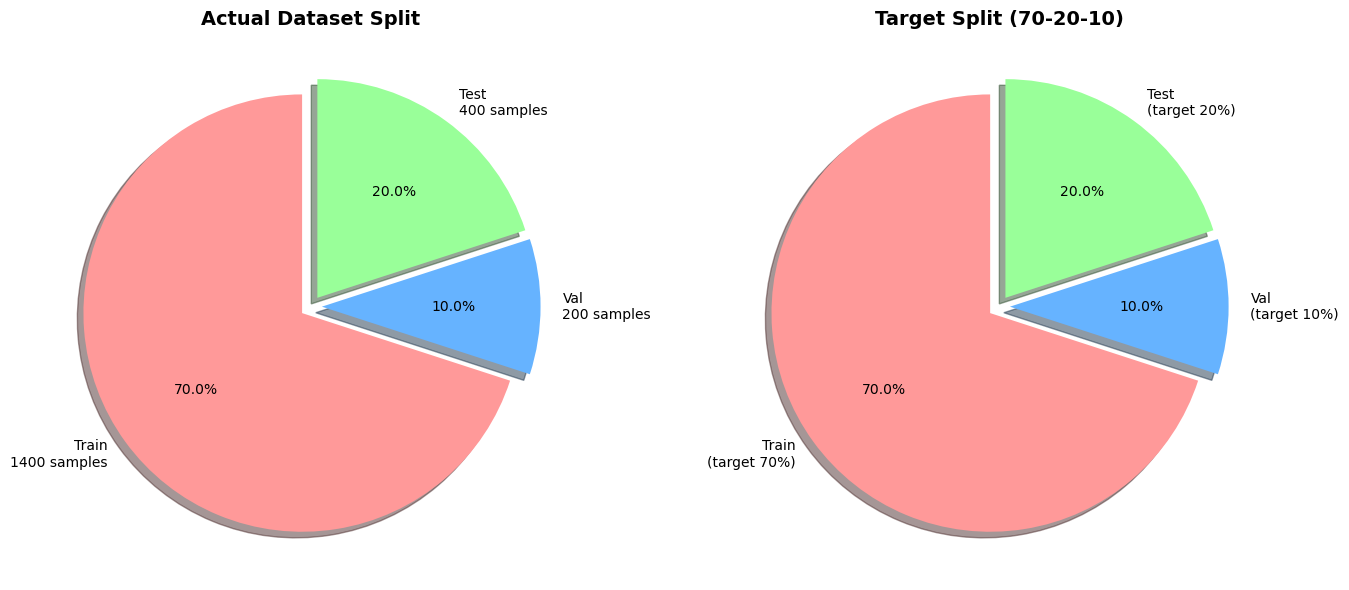


=== Split Comparison: Actual vs Target ===
Split      Actual %     Target %     Difference   Samples   
--------------------------------------------------------
Train       70.00%        70.0%       +0.00%      1400      
Val         10.00%        10.0%       +0.00%      200       
Test        20.00%        20.0%       +0.00%      400       

✓ Split is within ±1.0% of target (70-20-10)


In [12]:
# Create pie chart to visualize the split
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart with actual samples
sizes = [len(train_dataset), len(val_dataset), len(test_dataset)]
labels = [f'Train\n{len(train_dataset)} samples', 
          f'Val\n{len(val_dataset)} samples', 
          f'Test\n{len(test_dataset)} samples']
colors = ['#ff9999', '#66b3ff', '#99ff99']
explode = (0.05, 0.05, 0.05)

ax1.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.set_title('Actual Dataset Split', fontsize=14, fontweight='bold')

# Pie chart with target split
target_sizes = [70, 10, 20]
target_labels = ['Train\n(target 70%)', 'Val\n(target 10%)', 'Test\n(target 20%)']

ax2.pie(target_sizes, explode=explode, labels=target_labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.set_title('Target Split (70-20-10)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Print comparison table
total = len(train_dataset) + len(val_dataset) + len(test_dataset)
print("\n=== Split Comparison: Actual vs Target ===")
print(f"{'Split':<10} {'Actual %':<12} {'Target %':<12} {'Difference':<12} {'Samples':<10}")
print("-" * 56)

train_actual = (len(train_dataset) / total) * 100
val_actual = (len(val_dataset) / total) * 100
test_actual = (len(test_dataset) / total) * 100

print(f"{'Train':<10} {train_actual:>6.2f}%      {70:>6.1f}%      {train_actual-70:>+6.2f}%      {len(train_dataset):<10}")
print(f"{'Val':<10} {val_actual:>6.2f}%      {10:>6.1f}%      {val_actual-10:>+6.2f}%      {len(val_dataset):<10}")
print(f"{'Test':<10} {test_actual:>6.2f}%      {20:>6.1f}%      {test_actual-20:>+6.2f}%      {len(test_dataset):<10}")

# Check if within acceptable tolerance (±1%)
tolerance = 1.0
train_ok = abs(train_actual - 70) <= tolerance
val_ok = abs(val_actual - 10) <= tolerance
test_ok = abs(test_actual - 20) <= tolerance

if train_ok and val_ok and test_ok:
    print(f"\n✓ Split is within ±{tolerance}% of target (70-20-10)")
else:
    print(f"\n✗ Split deviates more than ±{tolerance}% from target")

### Visual Summary of 70-20-10 Split

## 10. Summary Statistics

In [13]:
print("\n" + "="*80)
print("SUMMARY STATISTICS")
print("="*80)

print(f"\nDataset: ESC-50")
print(f"Root directory: {root_dir}")
print(f"\nTotal classes: {train_dataset.get_num_classes()}")
print(f"Total samples: {len(train_dataset) + len(val_dataset) + len(test_dataset)}")

print(f"\nSplit distribution:")
print(f"  Train: {len(train_dataset):4d} samples ({len(train_dataset)/(len(train_dataset)+len(val_dataset)+len(test_dataset))*100:.1f}%)")
print(f"  Val:   {len(val_dataset):4d} samples ({len(val_dataset)/(len(train_dataset)+len(val_dataset)+len(test_dataset))*100:.1f}%)")
print(f"  Test:  {len(test_dataset):4d} samples ({len(test_dataset)/(len(train_dataset)+len(val_dataset)+len(test_dataset))*100:.1f}%)")

print(f"\nFold configuration:")
print(f"  Train folds: {train_dataset.train_folds}")
print(f"  Val folds:   {train_dataset.val_folds}")
print(f"  Test folds:  {train_dataset.test_folds}")

print(f"\nData properties:")
print(f"  Audio sample rate: {train_dataset.audio_sample_rate} Hz")
print(f"  Audio duration: {train_dataset.audio_duration} seconds")
print(f"  Image size: {train_dataset.image_size}")
print(f"  Text embeddings available: {'Yes' if train_dataset.text_embs is not None else 'No'}")

if train_dataset.text_embs is not None:
    sample_emb = next(iter(train_dataset.text_embs.values()))
    # Handle both dict and tensor cases
    if isinstance(sample_emb, dict):
        # If it's a dict, try to get the first tensor value
        if sample_emb:
            first_value = next(iter(sample_emb.values()))
            if torch.is_tensor(first_value):
                print(f"  Text embedding dimension: {first_value.shape}")
            else:
                print(f"  Text embedding type: {type(first_value)}")
    elif torch.is_tensor(sample_emb):
        print(f"  Text embedding dimension: {sample_emb.shape}")
    else:
        print(f"  Text embedding type: {type(sample_emb)}")

print("\n" + "="*80)


SUMMARY STATISTICS

Dataset: ESC-50
Root directory: /home/lpala/fedgfe/dataset/Audio/esc50-v2.0.0-full

Total classes: 50
Total samples: 2000

Split distribution:
  Train: 1400 samples (70.0%)
  Val:    200 samples (10.0%)
  Test:   400 samples (20.0%)

Fold configuration:
  Train folds: [0, 1, 2, 3]
  Val folds:   None
  Test folds:  [4]

Data properties:
  Audio sample rate: 16000 Hz
  Audio duration: 5.0 seconds
  Image size: (224, 224)
  Text embeddings available: Yes
  Text embedding type: <class 'dict'>



## 11. Audio Playback with Filters

Play audio samples filtered by class and dataset split (train/val/test)

In [14]:
# Import audio playback libraries
from IPython.display import Audio, display
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual
import torchaudio

print("Audio playback libraries imported successfully!")

Audio playback libraries imported successfully!


In [15]:
# Helper function to get samples filtered by class and split
def get_filtered_samples(class_name, split='train', max_samples=5):
    """
    Get samples filtered by class name and dataset split.
    
    Args:
        class_name: Name of the class to filter
        split: 'train', 'val', or 'test'
        max_samples: Maximum number of samples to return
    
    Returns:
        List of sample dictionaries
    """
    # Select the appropriate dataset
    if split == 'train':
        dataset = train_dataset
    elif split == 'val':
        dataset = val_dataset
    elif split == 'test':
        dataset = test_dataset
    else:
        raise ValueError(f"Invalid split: {split}. Must be 'train', 'val', or 'test'")
    
    # Check if class exists
    if class_name not in dataset.active_classes:
        print(f"Error: Class '{class_name}' not found in {split} dataset")
        print(f"Available classes: {sorted(dataset.active_classes.keys())}")
        return []
    
    # Filter samples by class
    filtered_samples = []
    for sample in dataset.samples:
        if sample['class_name'] == class_name:
            filtered_samples.append(sample)
            if len(filtered_samples) >= max_samples:
                break
    
    return filtered_samples

print("Helper function defined successfully!")

Helper function defined successfully!


In [16]:
# Function to play audio samples
def play_audio_samples(class_name, split='train', num_samples=3):
    """
    Play audio samples for a specific class and split.
    
    Args:
        class_name: Name of the class
        split: 'train', 'val', or 'test'
        num_samples: Number of samples to play
    """
    samples = get_filtered_samples(class_name, split, max_samples=num_samples)
    
    if not samples:
        print(f"No samples found for class '{class_name}' in {split} split")
        return
    
    print(f"\n{'='*80}")
    print(f"Playing {len(samples)} samples for class: {class_name} ({split} set)")
    print(f"{'='*80}\n")
    
    for i, sample in enumerate(samples):
        print(f"\n--- Sample {i+1}/{len(samples)} ---")
        print(f"Audio file: {sample['audio_filename']}")
        print(f"File ID: {sample['file_id']}")
        print(f"Fold: {sample['fold']}")
        print(f"Caption: {sample.get('caption', 'N/A')}")
        
        # Load and display audio
        audio_path = sample['audio_path']
        try:
            waveform, sample_rate = torchaudio.load(audio_path)
            # Convert to mono if stereo
            if waveform.shape[0] > 1:
                waveform = torch.mean(waveform, dim=0, keepdim=True)
            
            # Display audio player
            display(Audio(waveform.numpy(), rate=sample_rate))
            
        except Exception as e:
            print(f"Error loading audio: {e}")
    
    print(f"\n{'='*80}\n")

print("Audio playback function defined successfully!")

Audio playback function defined successfully!


In [17]:
# Function to compare samples across splits
def compare_across_splits(class_name, num_samples_per_split=2):
    """
    Play samples from the same class across all splits.
    
    Args:
        class_name: Name of the class to compare
        num_samples_per_split: Number of samples to play from each split
    """
    print(f"\n{'='*80}")
    print(f"Comparing class '{class_name}' across train/val/test splits")
    print(f"{'='*80}\n")
    
    for split in ['train', 'val', 'test']:
        print(f"\n{'*'*80}")
        print(f"SPLIT: {split.upper()}")
        print(f"{'*'*80}")
        play_audio_samples(class_name, split=split, num_samples=num_samples_per_split)

print("Compare function defined successfully!")

Compare function defined successfully!


In [18]:
# Function to explore random classes
def explore_random_classes(num_classes=5, split='train', samples_per_class=1):
    """
    Play samples from randomly selected classes.
    
    Args:
        num_classes: Number of random classes to explore
        split: 'train', 'val', or 'test'
        samples_per_class: Number of samples to play per class
    """
    import random
    
    # Get dataset
    if split == 'train':
        dataset = train_dataset
    elif split == 'val':
        dataset = val_dataset
    elif split == 'test':
        dataset = test_dataset
    else:
        raise ValueError(f"Invalid split: {split}")
    
    # Select random classes
    all_classes = sorted(dataset.get_class_names())
    random_classes = random.sample(all_classes, min(num_classes, len(all_classes)))
    
    print(f"\n{'='*80}")
    print(f"Exploring {len(random_classes)} random classes from {split} split")
    print(f"Selected classes: {random_classes}")
    print(f"{'='*80}\n")
    
    for class_name in random_classes:
        play_audio_samples(class_name, split=split, num_samples=samples_per_class)

print("Explore function defined successfully!")

Explore function defined successfully!


### Interactive Audio Player

Use the widgets below to select a class and dataset split, then play audio samples.

In [ ]:
# Create interactive widget
interact_manual(
    play_audio_samples,
    class_name=widgets.Dropdown(
        options=sorted(train_dataset.get_class_names()),
        value=sorted(train_dataset.get_class_names())[0],
        description='Class:',
        style={'description_width': 'initial'}
    ),
    split=widgets.Dropdown(
        options=['train', 'val', 'test'],
        value='train',
        description='Split:',
        style={'description_width': 'initial'}
    ),
    num_samples=widgets.IntSlider(
        min=1,
        max=10,
        value=3,
        description='Num samples:',
        style={'description_width': 'initial'}
    )
);

interactive(children=(Dropdown(description='Class:', options=('airplane', 'breathing', 'brushing_teeth', 'can_…

### Examples

You can also call the functions directly:

In [ ]:
# Example 1: Play 2 dog samples from train set
play_audio_samples('dog', split='train', num_samples=2)

In [ ]:
# Example 2: Play 1 airplane sample from test set
play_audio_samples('airplane', split='test', num_samples=1)

In [ ]:
# Example 3: Compare 'cat' class across all splits
compare_across_splits('cat', num_samples_per_split=1)

In [ ]:
# Example 4: Explore 3 random classes from train set
explore_random_classes(num_classes=3, split='train', samples_per_class=1)